In [1]:
pip install pandas scikit-learn numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np  # Import NumPy
from sklearn.decomposition import PCA

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_close_price_no_missing.csv"
data = pd.read_csv(file_path, index_col=0)

# Calculate log returns
log_returns = data.pct_change().apply(lambda x: (1 + x).apply(np.log))
# Drop any NaN values that may result from the percentage change
log_returns = log_returns.dropna()

# Fit PCA model to log returns
pca = PCA()
pca.fit(log_returns)

# Print explained variance ratios
print("Explained Variance Ratios:")
print(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(np.cumsum(pca.explained_variance_ratio_))


Explained Variance Ratios:
[6.61885734e-01 1.42368701e-01 7.67741787e-02 3.50273951e-02
 3.17118985e-03 3.07349250e-03 2.58765820e-03 2.56111468e-03
 2.40367750e-03 1.96669755e-03 1.73378321e-03 1.59021335e-03
 1.53904438e-03 1.38807343e-03 1.36968694e-03 1.27251772e-03
 1.22635811e-03 1.15666157e-03 1.10633381e-03 1.03519139e-03
 9.83617667e-04 8.82536731e-04 8.73776855e-04 8.57385721e-04
 8.31150801e-04 8.02699674e-04 7.88348584e-04 7.63937581e-04
 7.59680507e-04 7.24358160e-04 7.08908910e-04 6.83461545e-04
 6.38314563e-04 6.22791578e-04 6.03271962e-04 5.85460763e-04
 5.70441566e-04 5.39706460e-04 5.37918373e-04 5.27902643e-04
 5.12072220e-04 4.95336936e-04 4.88516231e-04 4.73220607e-04
 4.60689371e-04 4.57952060e-04 4.51276648e-04 4.45801781e-04
 4.35022012e-04 4.28735483e-04 4.15921723e-04 4.14218821e-04
 4.02559240e-04 4.00753855e-04 4.00380274e-04 3.92142506e-04
 3.90784427e-04 3.87135428e-04 3.80711929e-04 3.72169690e-04
 3.68471257e-04 3.65398507e-04 3.61305003e-04 3.58032854e-

In [7]:
import pandas as pd
import numpy as np

# Replace 'C:\Users\papip\OneDrive\Desktop\DATASETS\SP500_close_price_no_missing.csv' with your actual file path
df = pd.read_csv('C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_close_price_no_missing.csv')

# Print the column names
print(df.columns)


Index(['date', 'MMM', 'ACE', 'ABT', 'ANF', 'ADBE', 'AMD', 'AES', 'AET', 'AFL',
       ...
       'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'YHOO', 'YUM', 'ZMH',
       'ZION'],
      dtype='object', length=472)


In [12]:
import pandas as pd
import numpy as np

# Replace 'C:\Users\papip\OneDrive\Desktop\DATASETS\SP500_close_price_no_missing.csv' with your actual file path
df = pd.read_csv('C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_close_price_no_missing.csv')

# Get the list of all column names (excluding the 'date' column)
companies = df.columns[1:]

# Create a list to store DataFrames for each company's log returns
dfs = []

# Loop through each company column and calculate log returns
for company in companies:
    log_returns_df = pd.DataFrame({f'{company}_Log_Return': np.log(df[company] / df[company].shift(1))})
    dfs.append(log_returns_df)

# Concatenate all DataFrames at once
log_returns_df = pd.concat(dfs, axis=1)

# Concatenate the original DataFrame with the new log returns DataFrame
df = pd.concat([df, log_returns_df], axis=1)

# Display the updated DataFrame
print(df.head())


         date    MMM    ACE    ABT    ANF   ADBE   AMD    AES    AET    AFL  \
0  2011-01-03  86.79  62.24  47.82  58.03  31.29  8.47  12.54  31.04  57.54   
1  2011-01-04  86.67  62.20  48.27  56.22  31.51  8.77  12.60  31.20  56.49   
2  2011-01-05  86.67  61.99  48.27  55.35  32.22  8.91  12.77  31.50  56.38   
3  2011-01-06  86.14  61.72  48.17  53.53  32.27  8.69  12.99  32.09  56.07   
4  2011-01-07  86.23  61.26  48.37  53.57  32.04  8.83  12.99  32.16  55.85   

   ...  WYN_Log_Return  WYNN_Log_Return  XEL_Log_Return  XRX_Log_Return  \
0  ...             NaN              NaN             NaN             NaN   
1  ...       -0.006214         0.030719        0.004235       -0.026830   
2  ...       -0.003286         0.012819       -0.005935        0.005249   
3  ...       -0.014589         0.007264       -0.000851        0.000000   
4  ...       -0.003681         0.034794        0.008896       -0.014060   

   XLNX_Log_Return  XL_Log_Return  YHOO_Log_Return  YUM_Log_Return  \
0   

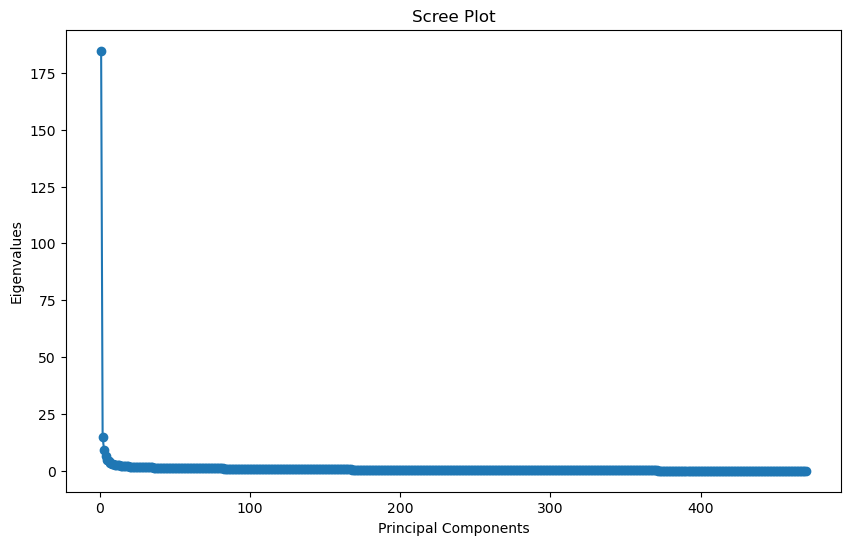

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'log_returns_df' and has the log returns data

# Drop any rows with missing values
log_returns_df = log_returns_df.dropna()

# Extract the log returns columns
log_returns_data = log_returns_df.iloc[:, 1:].values

# Standardize the data
standardized_data = (log_returns_data - log_returns_data.mean(axis=0)) / log_returns_data.std(axis=0)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Get the eigenvalues and explained variance ratio
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()


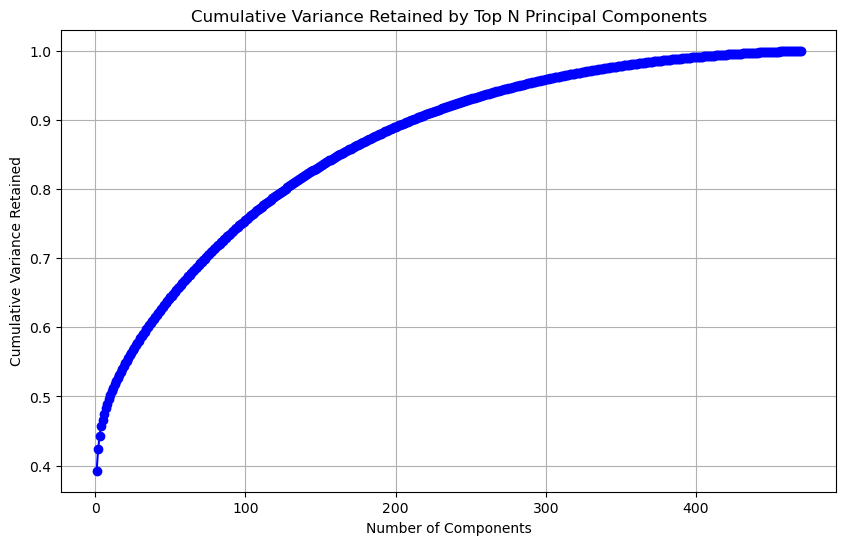

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'log_returns_df' and has the log returns data

# Drop any rows with missing values
log_returns_df = log_returns_df.dropna()

# Extract the log returns columns
log_returns_data = log_returns_df.iloc[:, 1:].values

# Standardize the data
standardized_data = (log_returns_data - log_returns_data.mean(axis=0)) / log_returns_data.std(axis=0)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(standardized_data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Variance Retained by Top N Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Retained')
plt.grid(True)
plt.show()


In [15]:
# Set the desired variance to retain
desired_variance_retained = 0.8

# Find the number of components needed
num_components_80_percent = np.argmax(cumulative_variance >= desired_variance_retained) + 1

print(f"Number of components needed to capture at least 80% of the variance: {num_components_80_percent}")


Number of components needed to capture at least 80% of the variance: 127


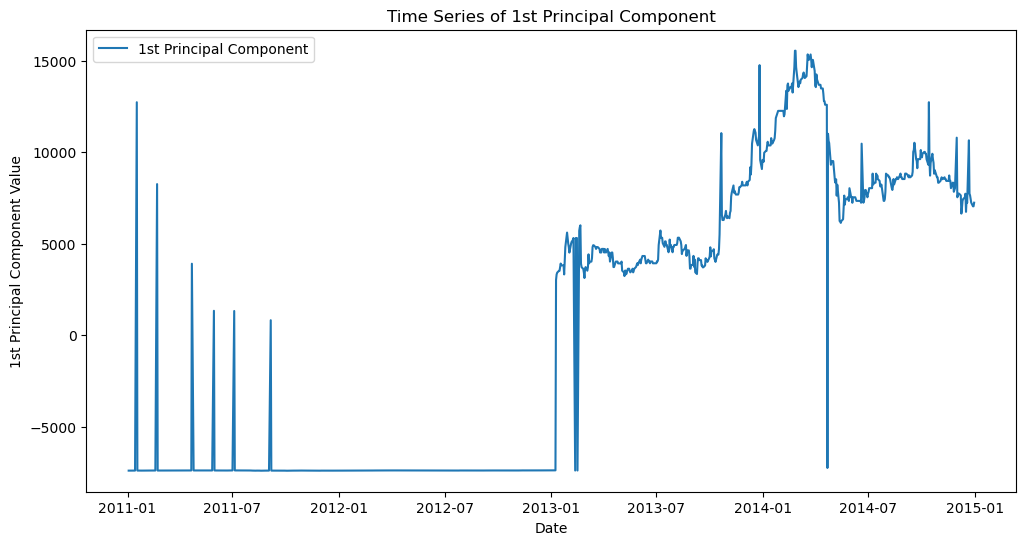

Date with the lowest 1st principal component value: 2011-10-03 00:00:00


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_close_price_no_missing.csv"
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Perform PCA
pca = PCA(n_components=len(data.columns))
principal_components = pca.fit_transform(data)

# Get the 1st principal component
first_principal_component = principal_components[:, 0]

# Create a DataFrame with date and 1st principal component values
pc_df = pd.DataFrame({'Date': data.index, '1st_Principal_Component': first_principal_component})

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(pc_df['Date'], pc_df['1st_Principal_Component'], label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.legend()
plt.show()

# Identify the date with the lowest value for the 1st principal component
min_pc_date = pc_df.loc[pc_df['1st_Principal_Component'].idxmin()]['Date']
print(f"Date with the lowest 1st principal component value: {min_pc_date}")


In [ ]:
For the U.S. stock market, 2011 was a long wild ride to nowhere. The broad S&P 500 endured huge daily swings but a year of drama left the index almost where it started. In August 2011, investors lost trillions due to many different variables causing the stock market to fall. There was a debt crisis in Europe, uninspiring economic news, and a bust to U.S. credit rating which caused a fear of double dip recession. 

In [34]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_close_price_no_missing.csv"
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Perform PCA
pca = PCA(n_components=len(data.columns))
pca.fit(data)

# Extract the weights (loadings) for the 1st and 2nd principal components
weights_1st_pc = pca.components_[0, :]
weights_2nd_pc = pca.components_[1, :]

# Create DataFrames for better visualization
weights_df_1st_pc = pd.DataFrame({'Company': data.columns, 'Weight_1st_PC': weights_1st_pc})
weights_df_2nd_pc = pd.DataFrame({'Company': data.columns, 'Weight_2nd_PC': weights_2nd_pc})

# Save the weights to separate CSV files
weights_df_1st_pc.to_csv("C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\Weights_1st_PC.csv", index=False)
weights_df_2nd_pc.to_csv("C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\Weights_2nd_PC.csv", index=False)

# Display the weights
print("Weights for the 1st Principal Component:")
print(weights_df_1st_pc.sort_values(by='Weight_1st_PC', ascending=False))

print("\nWeights for the 2nd Principal Component:")
print(weights_df_2nd_pc.sort_values(by='Weight_2nd_PC', ascending=False))


Weights for the 1st Principal Component:
    Company  Weight_1st_PC
422     TIE       0.992193
64      BMC       0.112402
347    PCLN       0.033353
297    NFLX       0.013492
312     CMG       0.013219
..      ...            ...
261      LO      -0.003640
271      MA      -0.004227
375     CRM      -0.004465
36     AAPL      -0.005634
102     CME      -0.009005

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Company  Weight_2nd_PC
64      BMC       0.993604
271      MA       0.004647
347    PCLN       0.002156
102     CME       0.002154
312     CMG       0.002088
..      ...            ...
180     FLS      -0.001310
185     BEN      -0.001479
128     DVA      -0.001518
229    ISRG      -0.002303
422     TIE      -0.112635

[471 rows x 2 columns]


Columns in weights_data: Index(['Company', 'Weight_1st_PC'], dtype='object')
Columns in industry_data: Index(['ticker', 'company_name', 'sector'], dtype='object')


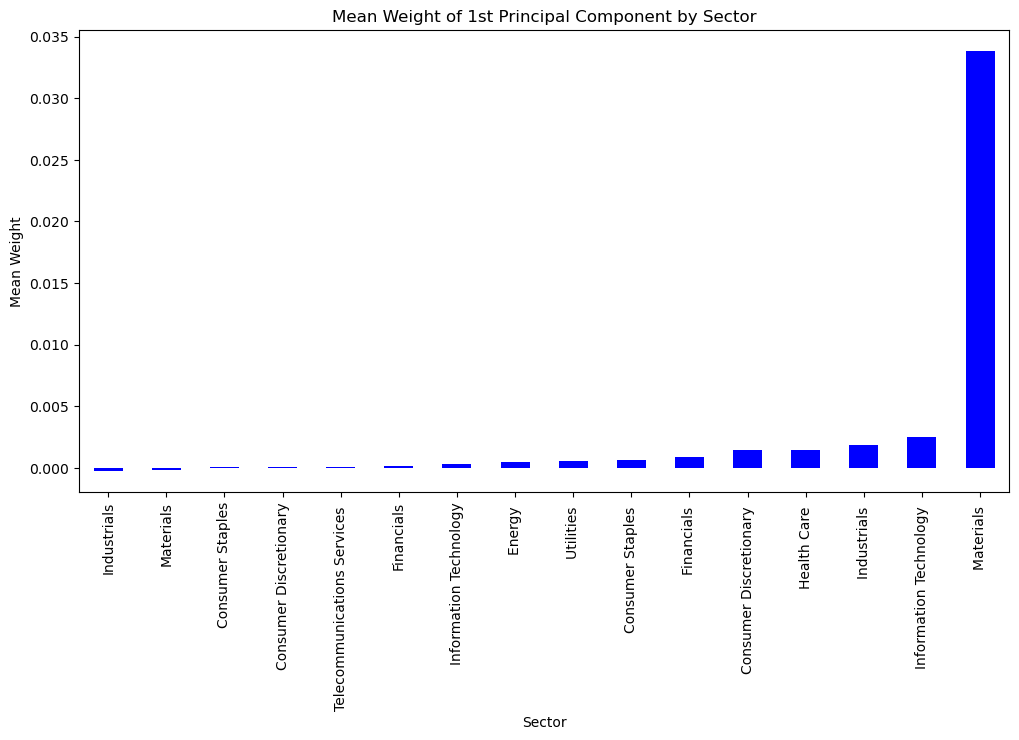

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with weights for the 1st principal component
weights_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\Weights_1st_PC.csv"
weights_data = pd.read_csv(weights_path)

# Load the dataset with industry information
industry_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_ticker.csv"
industry_data = pd.read_csv(industry_path, encoding='ISO-8859-1')

# Print column names of weights_data
print("Columns in weights_data:", weights_data.columns)

# Print column names of industry_data
print("Columns in industry_data:", industry_data.columns)

# Merge the two datasets on the 'ticker' column
merged_data = pd.merge(weights_data, industry_data, left_on='Company', right_on='ticker')

# Group by sector and calculate the mean weight for each sector
sector_weights = merged_data.groupby('sector')['Weight_1st_PC'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sector_weights.sort_values().plot(kind='bar', color='blue')
plt.title('Mean Weight of 1st Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()


Columns in weights_data_2nd_pc: Index(['Company', 'Weight_2nd_PC'], dtype='object')
Columns in industry_data: Index(['ticker', 'company_name', 'sector'], dtype='object')


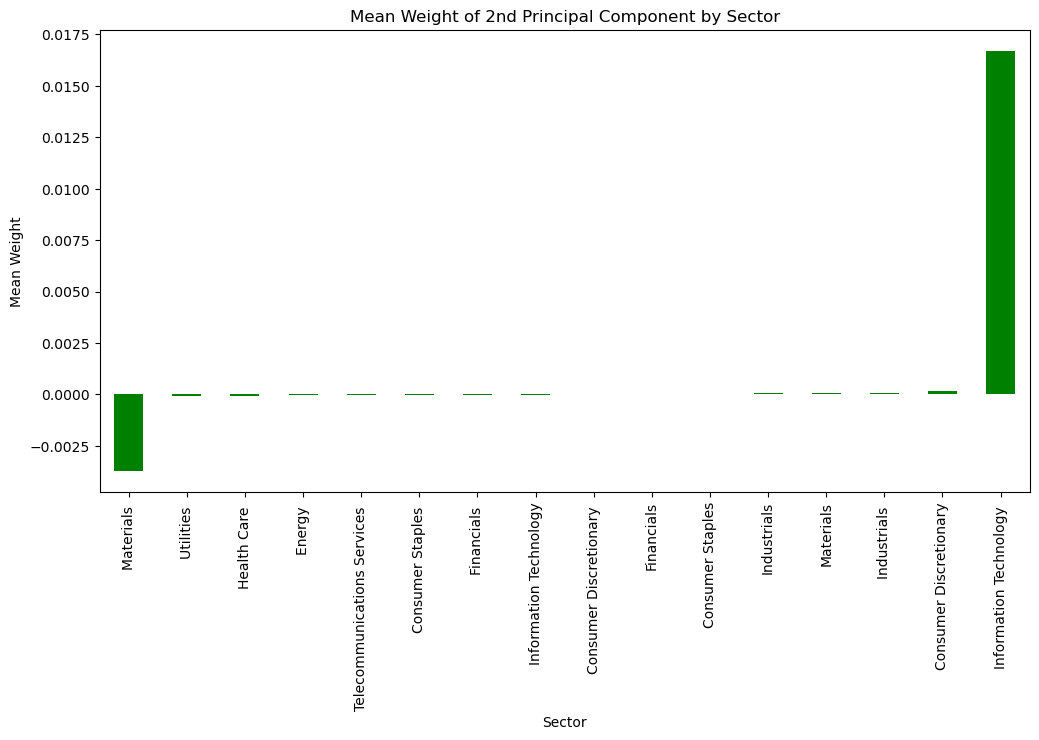

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with weights for the 2nd principal component
weights_path_2nd_pc = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\Weights_2nd_PC.csv"
weights_data_2nd_pc = pd.read_csv(weights_path_2nd_pc)

# Load the dataset with industry information
industry_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\SP500_ticker.csv"
industry_data = pd.read_csv(industry_path, encoding='ISO-8859-1')

# Print column names of weights_data_2nd_pc
print("Columns in weights_data_2nd_pc:", weights_data_2nd_pc.columns)

# Print column names of industry_data
print("Columns in industry_data:", industry_data.columns)

# Merge the two datasets on the 'ticker' column
merged_data_2nd_pc = pd.merge(weights_data_2nd_pc, industry_data, left_on='Company', right_on='ticker')

# Group by sector and calculate the mean weight for each sector
sector_weights_2nd_pc = merged_data_2nd_pc.groupby('sector')['Weight_2nd_PC'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
sector_weights_2nd_pc.sort_values().plot(kind='bar', color='green')
plt.title('Mean Weight of 2nd Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()


In [40]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1c/19/bf19123baf16a55fd38cbb100b5a49380b9b6db7279987034689d11254c7/yfinance-0.2.32-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/24/41/e53837badf8c85bf07ca1ea735cdd78df0f5bfe59e3affaaa174a55522c4/frozendict-2.3.9-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.9 MB 3.6 MB/s eta 0:00:01
     ----- ---------------------------------- 0.4/2.9 MB 4.2 MB/s eta 0:00:01
     -------- ------------------------------- 0.6/2.9 MB 4.4 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/2.9 MB 4.6 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/2.9 MB 4.6 MB/s eta 0:00:01
     ------------------ --------------------- 1.4/2.9 MB 5.0 MB/s eta 0:00:01
     ----------------------- --------------

In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define a list of stock tickers excluding 'FB'
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Download historical stock prices using yfinance
data = yf.download(tickers, start='2022-01-01', end='2023-01-01', group_by='ticker', auto_adjust=True, threads=True)

# Check if 'Adj Close' is present for all stocks
if 'Adj Close' not in data.columns.get_level_values(1):
    print("Error: 'Adj Close' column not found in the downloaded data for all stocks.")
else:
    # Check for missing values and handle if needed
    # For now, we will drop any rows with missing values
    data = data.dropna()

    try:
        # Extract the 'Adj Close' prices for each stock
        adj_close_data = data['Adj Close']

        # Perform PCA
        pca = PCA(n_components=len(adj_close_data.columns))
        pca.fit(adj_close_data)

        # Extract the 1st principal component
        pc1 = pca.transform(adj_close_data)[:, 0]

        # Create a time series DataFrame
        pc1_df = pd.DataFrame({'Date': adj_close_data.index, 'PC1': pc1})

        # Plot the time series of the 1st principal component
        plt.figure(figsize=(10, 6))
        plt.plot(pc1_df['Date'], pc1_df['PC1'], label='1st Principal Component')
        plt.title('Time Series of the 1st Principal Component')
        plt.xlabel('Date')
        plt.ylabel('Principal Component Value')
        plt.legend()
        plt.show()

        # Identify the date with the lowest value for the 1st principal component
        min_date = pc1_df.loc[pc1_df['PC1'].idxmin(), 'Date']
        print(f"Date with the lowest value for the 1st principal component: {min_date}")

        # Conduct research on the internet to identify events on or around the identified date
        # (Manually search for news or market events related to the identified date)
    except KeyError as e:
        print(f"Error: {e}")


[*********************100%%**********************]  4 of 4 completed
Error: 'Adj Close' column not found in the downloaded data for all stocks.


In [56]:
# Download historical stock prices using yfinance
data = yf.download(tickers, start='2022-01-01', end='2023-01-01', group_by='ticker', auto_adjust=True, threads=True)

# Print the columns
print(data.columns)


[*********************100%%**********************]  4 of 4 completed
MultiIndex([( 'AMZN',   'Open'),
            ( 'AMZN',   'High'),
            ( 'AMZN',    'Low'),
            ( 'AMZN',  'Close'),
            ( 'AMZN', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume'),
            ( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume')],
           )


In [58]:
# Print the columns
print(data.columns)


MultiIndex([( 'AMZN',   'Open'),
            ( 'AMZN',   'High'),
            ( 'AMZN',    'Low'),
            ( 'AMZN',  'Close'),
            ( 'AMZN', 'Volume'),
            ( 'AAPL',   'Open'),
            ( 'AAPL',   'High'),
            ( 'AAPL',    'Low'),
            ( 'AAPL',  'Close'),
            ( 'AAPL', 'Volume'),
            ( 'MSFT',   'Open'),
            ( 'MSFT',   'High'),
            ( 'MSFT',    'Low'),
            ( 'MSFT',  'Close'),
            ( 'MSFT', 'Volume'),
            ('GOOGL',   'Open'),
            ('GOOGL',   'High'),
            ('GOOGL',    'Low'),
            ('GOOGL',  'Close'),
            ('GOOGL', 'Volume')],
           )


In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the adjusted close prices for each stock
adj_close_data = data.loc[:, (slice(None), 'Close')].dropna()

# Standardize the data
scaler = StandardScaler()
adj_close_scaled = scaler.fit_transform(adj_close_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(adj_close_scaled)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Print the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)


Explained Variance Ratio:
[0.91646589 0.05084491 0.02585534 0.00683386]

Cumulative Explained Variance:
[0.91646589 0.9673108  0.99316614 1.        ]


[*********************100%%**********************]  4 of 4 completed


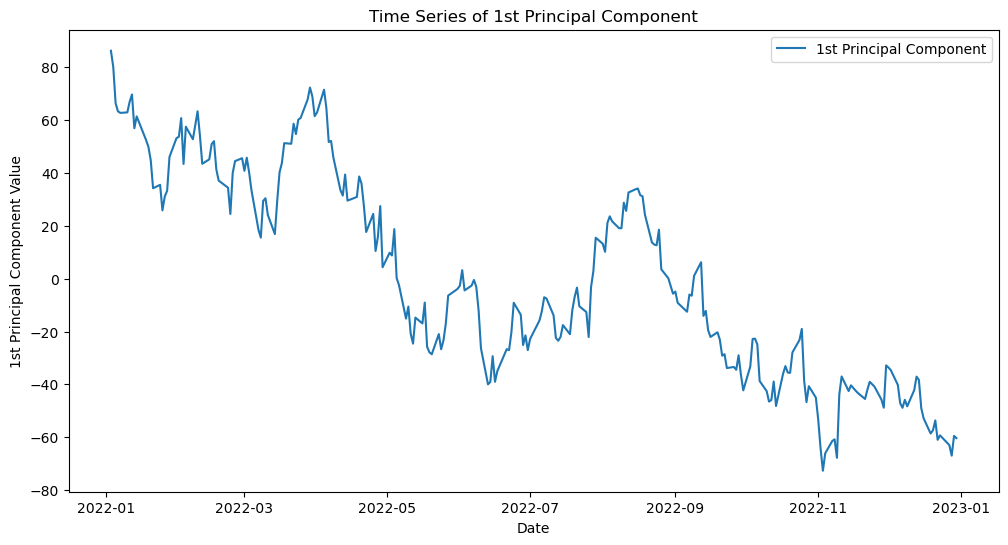

Date with Lowest Value: 2022-11-03 00:00:00


In [61]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Download Historical Stock Data using yfinance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2022-01-01'
end_date = '2022-12-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 2: Perform PCA
pca = PCA(n_components=len(tickers))
pca.fit(data.dropna())

# Step 3: Compute the 1st Principal Component Time Series
pca_data = pca.transform(data.dropna())
pc1_time_series = pca_data[:, 0]

# Step 4: Plot the Time Series
plt.figure(figsize=(12, 6))
plt.plot(data.index, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.legend()
plt.show()

# Step 5: Identify the Date with the Lowest Value
min_value_date = data.index[pc1_time_series.argmin()]

# Step 6: Conduct Research (Manually)
# You can use 'min_value_date' to search for relevant events on the internet
# Look for news articles, financial reports, or other sources around that date
print(f"Date with Lowest Value: {min_value_date}")


In [62]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Download Historical Stock Data using yfinance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2022-01-01'
end_date = '2022-12-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Step 2: Perform PCA
pca = PCA(n_components=len(tickers))
pca.fit(data.dropna())

# Step 3: Extract Weights for 1st and 2nd Principal Components
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Step 4: Display the Weights
print("Weights for 1st Principal Component:")
print(pd.Series(weights_pc1, index=tickers))

print("\nWeights for 2nd Principal Component:")
print(pd.Series(weights_pc2, index=tickers))


[*********************100%%**********************]  4 of 4 completed
Weights for 1st Principal Component:
AAPL     0.300233
MSFT     0.598201
GOOGL    0.404262
AMZN     0.623368
dtype: float64

Weights for 2nd Principal Component:
AAPL     0.242635
MSFT     0.685005
GOOGL   -0.165918
AMZN    -0.666609
dtype: float64


Ticker          object
Weight_PC1     float64
Weight_PC2     float64
Sector        category
dtype: object


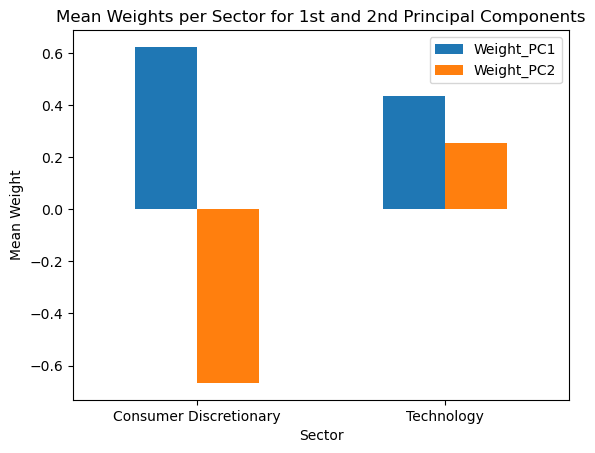

In [69]:
import yfinance as yf
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have a dictionary mapping tickers to sectors
sector_dict = {'AAPL': 'Technology', 'MSFT': 'Technology', 'GOOGL': 'Technology', 'AMZN': 'Consumer Discretionary'}

# ... (Previous code for downloading data, cleaning, and preparing)

# Display data types of all columns
print(weights_df.dtypes)

# Plot Mean Weights per Sector
numeric_columns = weights_df.select_dtypes(include=['float64']).columns
mean_weights_per_sector = weights_df.groupby('Sector', observed=True)[numeric_columns].mean()

mean_weights_per_sector.plot(kind='bar', y=['Weight_PC1', 'Weight_PC2'], rot=0)
plt.title('Mean Weights per Sector for 1st and 2nd Principal Components')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()


In [21]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\BMI.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data = data.dropna()

# Define predictors (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform forward stepwise regression
def forward_selection(X, y):
    selected_features = []
    while len(selected_features) < X.shape[1]:
        remaining_features = list(set(X.columns) - set(selected_features))
        best_feature = None
        best_model = None
        best_mse = float('inf')

        for feature in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [feature]])).fit()
            mse = mean_squared_error(y, model.predict(sm.add_constant(X[selected_features + [feature]])))
            if mse < best_mse:
                best_mse = mse
                best_feature = feature
                best_model = model

        selected_features.append(best_feature)
        print(f"Added feature: {best_feature}, MSE: {best_mse}")

    return best_model, selected_features

# Function to perform backward stepwise regression
def backward_elimination(X, y):
    features = list(X.columns)
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        mse = mean_squared_error(y, model.predict(sm.add_constant(X[features])))
        worst_feature = None
        worst_mse = mse

        for feature in features:
            temp_features = features.copy()
            temp_features.remove(feature)
            temp_model = sm.OLS(y, sm.add_constant(X[temp_features])).fit()
            temp_mse = mean_squared_error(y, temp_model.predict(sm.add_constant(X[temp_features])))
            if temp_mse < worst_mse:
                worst_mse = temp_mse
                worst_feature = feature

        if worst_feature:
            features.remove(worst_feature)
            print(f"Removed feature: {worst_feature}, MSE: {worst_mse}")

    return model, features

# Perform forward selection
forward_model, selected_features_forward = forward_selection(X_train, y_train)

# Perform backward elimination
backward_model, selected_features_backward = backward_elimination(X_train, y_train)


Added feature: Abdomen, MSE: 23.582508647337647
Added feature: Wrist, MSE: 20.29638578285635
Added feature: Weight, MSE: 19.310017452010648
Added feature: Biceps, MSE: 18.937869949139653
Added feature: Age, MSE: 18.66755821815191
Added feature: Neck, MSE: 18.405097868210508
Added feature: Height, MSE: 18.262052764154948
Added feature: Forearm, MSE: 18.164412461426014
Added feature: Thigh, MSE: 18.07878476208619
Added feature: Hip, MSE: 18.021968103296974
Added feature: Chest, MSE: 17.971258881336635
Added feature: Ankle, MSE: 17.933756660084583
Added feature: Knee, MSE: 17.93362103355599


KeyboardInterrupt: 

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "C:/Users/papip/OneDrive/Desktop/DATASETS/BMI.csv"
data = pd.read_csv(file_path)

# Extract input features (X) and output variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Calculate correlation coefficients
correlations = X.corrwith(y)

# Create a DataFrame to store feature names and their correlation coefficients
correlation_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

# Sort the DataFrame by absolute correlation values in descending order
correlation_df['AbsoluteCorrelation'] = np.abs(correlation_df['Correlation'])
sorted_correlation_df = correlation_df.sort_values(by='AbsoluteCorrelation', ascending=False)

# Display the ranking
print(sorted_correlation_df)


    Feature  Correlation  AbsoluteCorrelation
5   Abdomen     0.813432             0.813432
4     Chest     0.702620             0.702620
6       Hip     0.625201             0.625201
1    Weight     0.612925             0.612925
7     Thigh     0.559608             0.559608
8      Knee     0.508665             0.508665
10   Biceps     0.493271             0.493271
3      Neck     0.490592             0.490592
11  Forearm     0.361387             0.361387
12    Wrist     0.346575             0.346575
0       Age     0.291458             0.291458
9     Ankle     0.265970             0.265970
2    Height     0.133211             0.133211


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\BMI.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data = data.dropna()

# Define predictors (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha parameter

# Fit the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE) for Lasso Regression: {mse}')


Mean Squared Error (MSE) for Lasso Regression: 19.526728412222074


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
file_path = "C:\\Users\\papip\\OneDrive\\Desktop\\DATASETS\\BMI.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data = data.dropna()

# Define predictors (X) and target variable (y)
X = data.drop(columns=['fatpctg'])
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the n_estimators parameter

# Fit the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print('Feature Importance Ranking:')
print(feature_importance_df)


Feature Importance Ranking:
    Feature  Importance
5   Abdomen    0.714957
1    Weight    0.031164
12    Wrist    0.030504
2    Height    0.029040
6       Hip    0.028463
3      Neck    0.026902
4     Chest    0.024049
0       Age    0.023840
9     Ankle    0.019951
10   Biceps    0.019619
8      Knee    0.019410
11  Forearm    0.016606
7     Thigh    0.015493
